# Embed Matplotlib Scatter Plot Animation in Jupyter Notebooks

In this notebook, I will be replicating Louis Tiao's [Embedding Matplotlib Animations in Jupyter Notebooks](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/) and applying it to scatter plots, and more notably, using a [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) map.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

First we will create a basic scatter plot with some test data

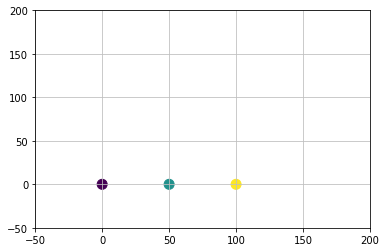

In [2]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.grid(True, linestyle='-', color='0.75')
ax.set_ylim([-50, 200])
ax.set_xlim([-50, 200])

x = [0, 50, 100]
y = [0, 0, 0]

# parameter 'c' specifies the color sequence
# parameter 's' specifies the size of the mark
scat = ax.scatter(x=x, y=y, c=x, s=100)

Now we will create an animation function and animation object. The function will be called on each frame of the animation

In [5]:
def animate(i, scat):
    # We use the set_offsets() function on the scatter plot object `scat`
    # to pass in the new data as a tuple of the [x, y] coordinates we want to use
    scat.set_offsets(
        ([0, i], [50, i / 2], [100, i * 3])
    )
    return scat,  # Make sure to add the comma, this function must return a tuple

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(
    fig, animate,
    fargs=(scat,),  # fargs will pass these objects into the animate() function as arguments
                    # Must be a tuple, hence (scat,)
    frames=100, interval=20, blit=True
)

In [6]:
HTML(anim.to_html5_video())

### Example using a Cartopy Map

In [92]:
import cartopy.crs as ccrs
import random

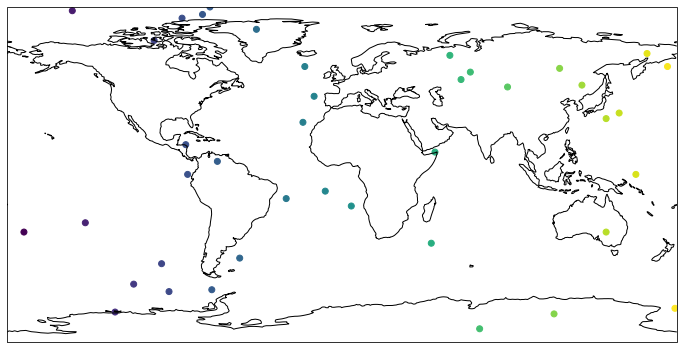

In [97]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.coastlines()
ax.set_global()

lats = [random.randint(-90, 90) for x in range(40)]
lons = [random.randint(-180, 180) for x in range(40)]

scat = ax.scatter(x=lons, y=lats, transform=ccrs.PlateCarree(), c=lons)

In [98]:
# animation function. This is called sequentially
def animate(i, scat):
    scat.set_offsets(
        tuple((x, y+i) for x, y in zip(lons, lats))
    )
    return scat,  # Dont forget the comma

In [99]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, fargs=(scat,),
                               frames=100, interval=50, blit=True)

In [100]:
HTML(anim.to_html5_video())